In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from scipy.stats import loguniform

from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("./spectrum_1201_2.csv",encoding='unicode_escape') # (502,513)
df = pd.DataFrame(df)
print(df.shape)
y = df['class'] 
wave = pd.array(df.columns)[10:-40].astype(float) # 513--> 463
X = df.iloc[:,10:-40]  #(219,463)
X.shape

(332, 513)


(332, 463)

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 


(332, 463)
(332,)


In [4]:
df['class'].value_counts()

class
PET                63
PE                 58
PP                 42
Modified starch    41
PVC                41
PS                 36
other              30
BG                 21
Name: count, dtype: int64

In [5]:
y_test.value_counts()

class
PET                14
PE                 14
PS                 10
other               7
PVC                 7
Modified starch     5
PP                  5
BG                  5
Name: count, dtype: int64

In [6]:
X_train['class'] = y_train
def plot_class(df,name):
     tmp = df[df['class'] == name]
     x = pd.array(pd.array(tmp.columns)[:-1])
     y = tmp.iloc[:,:-1]
     plt.title(name)
     for i in range(tmp.shape[0]):
          plt.plot(y.iloc[i,:])


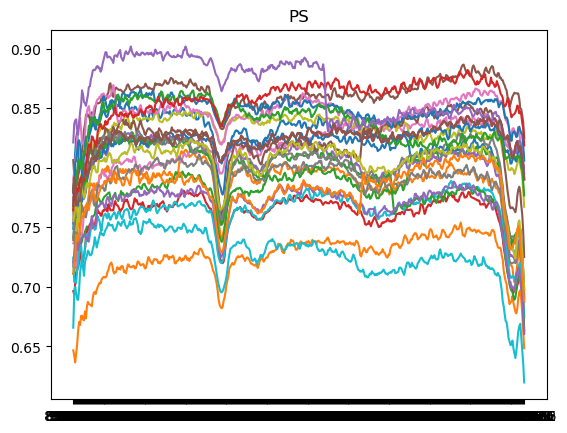

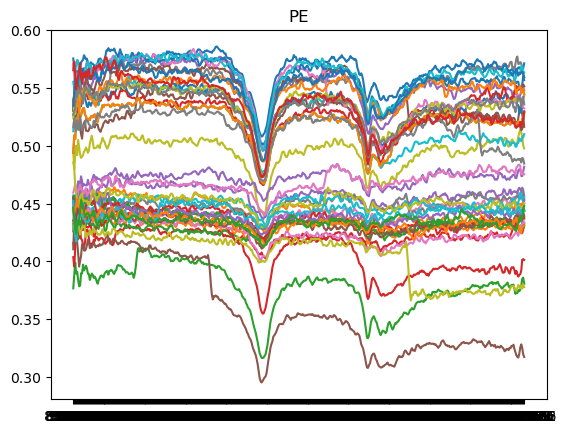

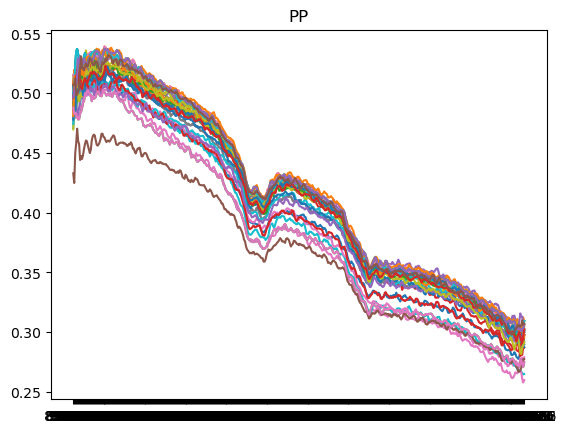

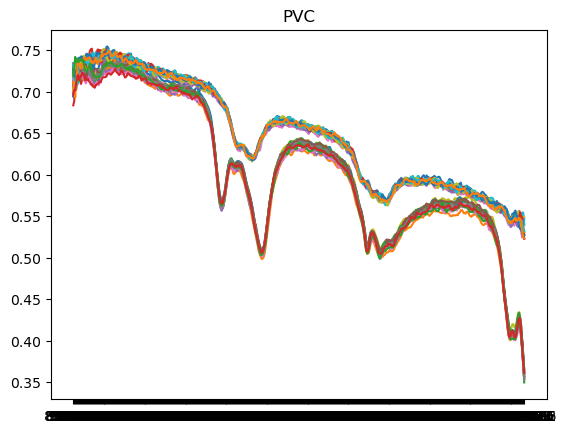

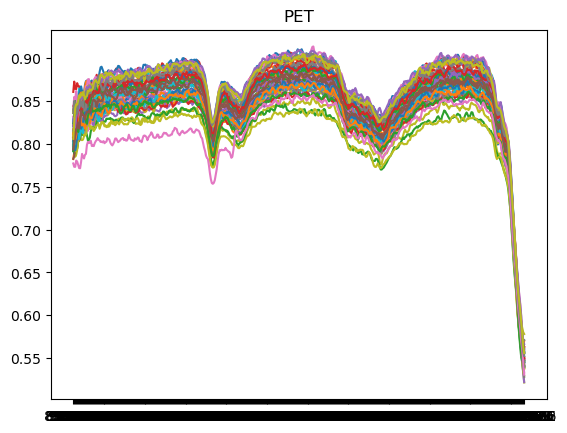

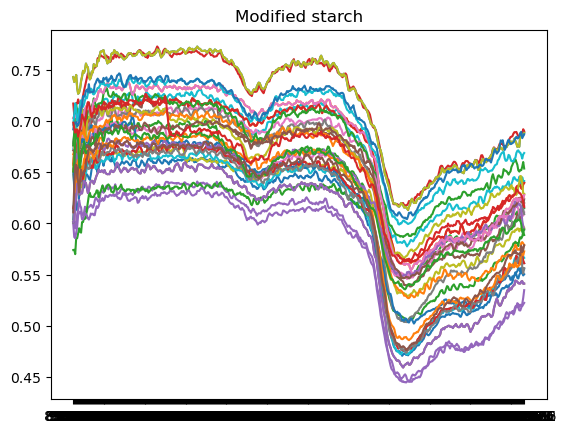

In [7]:
plot_class(X_train,'PS')
plt.show()
plot_class(X_train,'PE')
plt.show()
plot_class(X_train,'PP')
plt.show()
plot_class(X_train,'PVC')
plt.show()
plot_class(X_train,'PET')
plt.show()
plot_class(X_train,'Modified starch')
plt.show()

In [8]:
X_train = X_train.drop(['class'],axis=1)

In [9]:
color_dict ={"PS":"yellow",
             "PE":"red",
             "PET":"green",
             "Modified starch":"pink",
             "PP":"blue",
             "PVC":"orange",
             "BG":"black",
             "other":"white"}


[9.78263039e-01 1.48272702e-02 4.13323742e-03 1.57507757e-03
 5.52360145e-04 2.32265168e-04 1.20852308e-04 7.67887941e-05
 4.70012308e-05 2.27766151e-05]


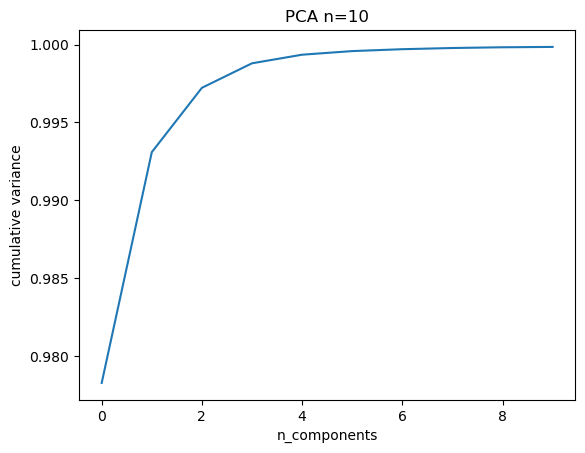

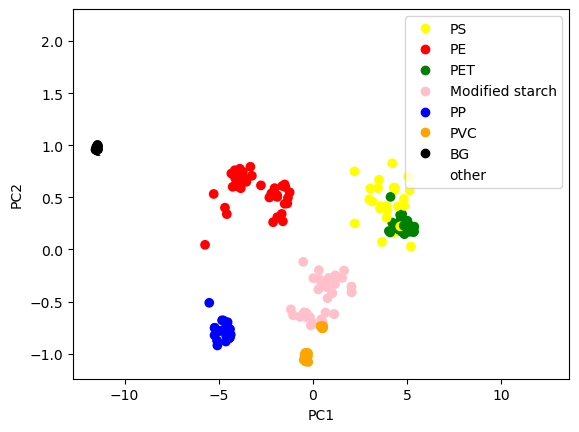

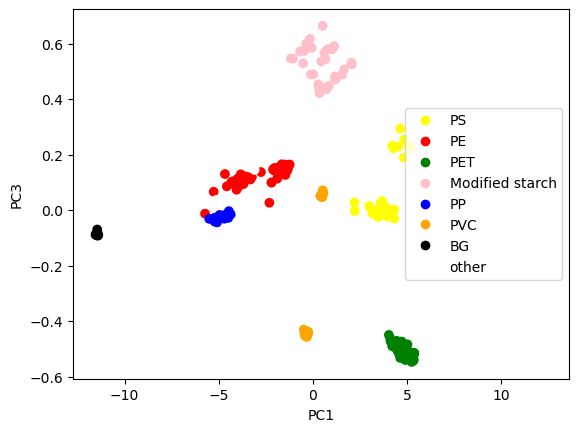

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
variance = pca.explained_variance_ratio_
print(variance)
plt.plot(np.cumsum(variance))
plt.xlabel("n_components")
plt.ylabel("cumulative variance")
plt.title("PCA n=10")
plt.show()


pca = PCA(n_components=4)
pca.fit(X_train)
X_pca = pca.fit_transform(X_train)
X_pca = pd.DataFrame(X_pca)
X_test_pca = pca.transform(X_test)
y = y_train

plt.scatter(np.array(X_pca[0]),np.array(X_pca[1]),c=y.map(color_dict),label=color_dict.keys)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.scatter(np.array(X_pca[0]),np.array(X_pca[2]),c=y.map(color_dict),label=color_dict.keys)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()


[0.96226415 0.90566038 0.9245283  0.98113208 0.94339623]
cv accuracy is :  0.9433962264150944
Logistic regression accuray :  0.9701492537313433


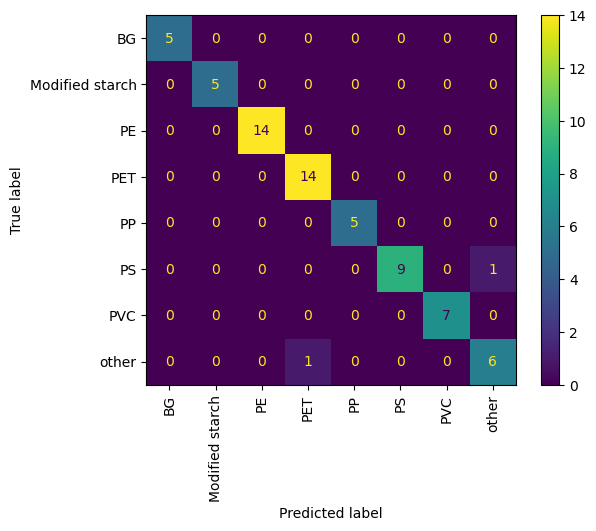

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=20000)
scores = cross_val_score(lr,X_pca,y_train,cv=5,scoring="accuracy")
print(scores)
print("cv accuracy is : ",scores.mean())
lr.fit(X_pca,y_train)
prediction = lr.predict(X_test_pca )

from sklearn.metrics import accuracy_score

print('Logistic regression accuray : ', accuracy_score(y_test,prediction))
cm = confusion_matrix(y_test,prediction)
ConfusionMatrixDisplay(cm,display_labels=lr.classes_).plot(xticks_rotation=90)

[0.96226415 0.9245283  0.94339623 0.98113208 0.94339623]
cv accuracy is :  0.9509433962264151
Logistic regression accuray :  0.9850746268656716


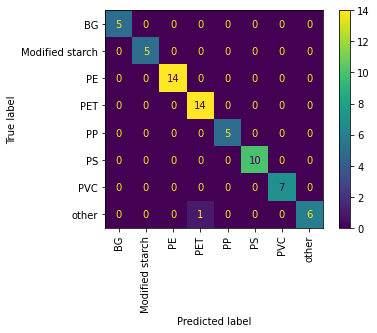

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=2000)
scores = cross_val_score(lr,X_train,y_train,cv=5,scoring="accuracy")
print(scores)
print("cv accuracy is : ",scores.mean())
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

from sklearn.metrics import accuracy_score

print('Logistic regression accuray : ', accuracy_score(y_test,prediction))
cm = confusion_matrix(y_test,prediction)
ConfusionMatrixDisplay(cm,display_labels=lr.classes_).plot(xticks_rotation=90)

In [39]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1,10,100,1000]

lr_cv = LogisticRegressionCV(Cs=Cs, cv = 5, penalty='l2', multi_class='ovr')
lr_cv.fit(X_pca, y_train)   
print("Optimized C:", lr_cv.C_)

/Users/alicetsai/opt/anaconda3/envs/python3_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1914: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Optimized C: [   1   10 1000    1    1    1   10    1]


/Users/alicetsai/opt/anaconda3/envs/python3_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1914: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic regression L2 loss accuray :  0.939622641509434
Logistic regression L2 loss accuray :  0.9552238805970149


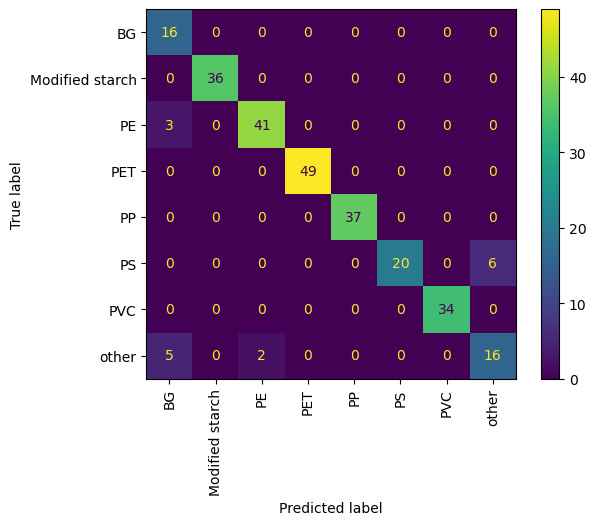

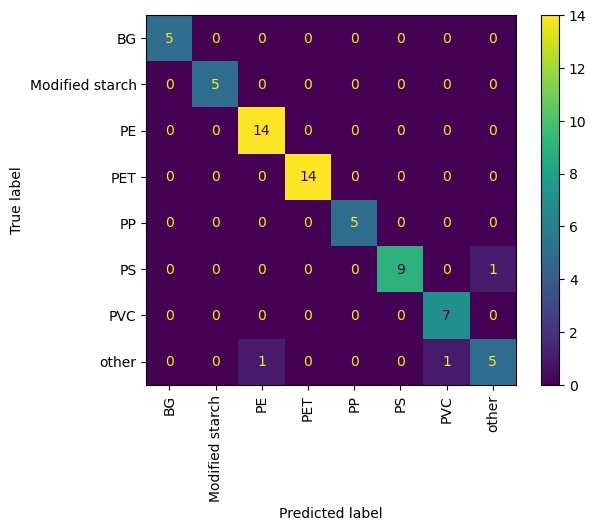

In [60]:
cv_BG= lr_cv.scores_['BG']
cv_Modified_starch = lr_cv.scores_['Modified starch']
cv_PP = lr_cv.scores_['PP']
 
cv_scores_modfied_startch = []
for i in range(4):
    cv_scores_modfied_startch.append(cv_Modified_starch[:,i].mean())

cv_scores_PP = []
for i in range(4):
    cv_scores_PP.append(cv_PP[:,i].mean())

cv_scores_PP
cv_scores_modfied_startch

# best cs = 10 
lr_l2 = LogisticRegressionCV(Cs=10, penalty='l2', solver='liblinear', multi_class='ovr')
lr_l2.fit(X_pca, y_train)

prediction = lr_l2.predict(X_pca)
accuracy_score(y_train,prediction)
print('Logistic regression L2 loss accuray : ', accuracy_score(y_train,prediction))
cm = confusion_matrix(y_train,prediction)
ConfusionMatrixDisplay(cm,display_labels=lr.classes_).plot(xticks_rotation=90)



prediction = lr_l2.predict(X_test_pca)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)
print('Logistic regression L2 loss accuray : ', accuracy_score(y_test,prediction))
cm = confusion_matrix(y_test,prediction)
ConfusionMatrixDisplay(cm,display_labels=lr.classes_).plot(xticks_rotation=90)

In [43]:
cv_BG= lr_cv.scores_['BG']
cv_Modified_starch = lr_cv.scores_['Modified starch']
cv_PP = lr_cv.scores_['PP']
 
cv_scores_modfied_startch = []
for i in range(4):
    cv_scores_modfied_startch.append(cv_Modified_starch[:,i].mean())

cv_scores_PP = []
for i in range(4):
    cv_scores_PP.append(cv_PP[:,i].mean())

[0.9773584905660376, 0.9735849056603774, 0.9773584905660376, 0.9735849056603773, 0.969811320754717, 0.9584905660377359, 0.969811320754717, 0.9584905660377359, 0.9622641509433961, 0.9622641509433961, 0.9622641509433961, 0.9584905660377359]


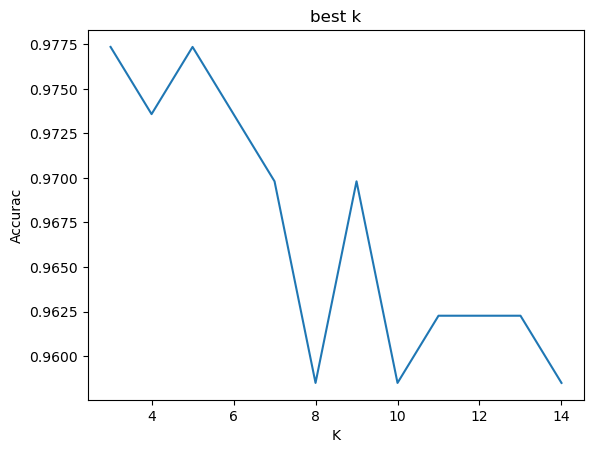

In [45]:
from sklearn.neighbors import KNeighborsClassifier
k_value_range = range(3,15)
k_value_scores = []
for k in k_value_range:
 knn_model = KNeighborsClassifier(n_neighbors = k, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
 accuracy = cross_val_score(knn_model,X_pca, y_train, cv=5, scoring="accuracy")
 k_value_scores.append(accuracy.mean())
print(k_value_scores)
## Data Visualization
import matplotlib.pyplot as plt
 
plt.plot(k_value_range,k_value_scores)
plt.title("best k")
plt.xlabel("K")
plt.ylabel("Accurac")
plt.show()

# best k = 5



KNN n=5 accuray :  0.9811320754716981


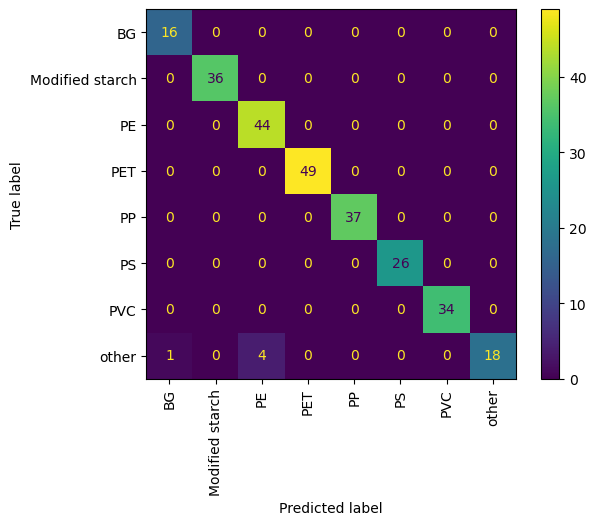

In [52]:
knn_model = KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn_model.fit(X_pca,y_train)
prediction = knn_model.predict(X_pca)
cm = confusion_matrix(y_train,prediction)
ConfusionMatrixDisplay(cm,display_labels=lr.classes_).plot(xticks_rotation=90)
print('KNN n=5 accuray : ', accuracy_score(y_train,prediction))

KNN n=5 accuray :  0.9253731343283582


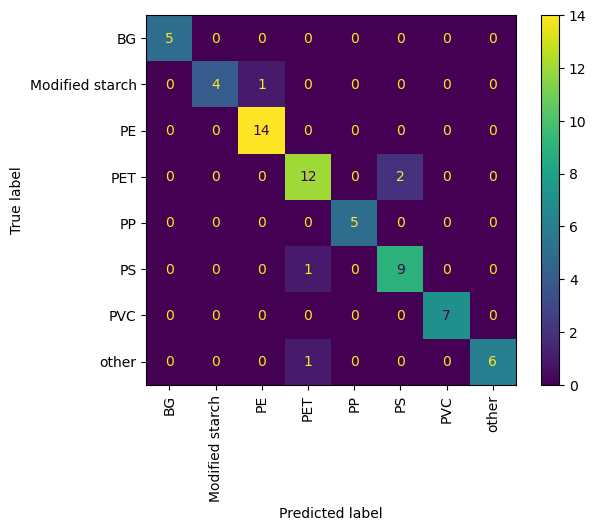

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn_model.fit(X_train,y_train)
prediction = knn_model.predict(X_test)

accuracy_score(y_test,prediction)
print('KNN n=5 accuray : ', accuracy_score(y_test,prediction))
cm = confusion_matrix(y_test,prediction)
ConfusionMatrixDisplay(cm,display_labels=lr.classes_).plot(xticks_rotation=90)

In [97]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf"), param_grid, n_iter=50
)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 2.468s
Best estimator found by grid search:
SVC(C=13141.761980616928, gamma=0.0499755511603514)


Predicting  on the train set
done in 0.005s
                 precision    recall  f1-score   support

             BG       0.94      1.00      0.97        16
Modified starch       1.00      1.00      1.00        36
             PE       1.00      1.00      1.00        44
            PET       1.00      1.00      1.00        49
             PP       1.00      1.00      1.00        37
             PS       1.00      1.00      1.00        26
            PVC       1.00      1.00      1.00        34
          other       1.00      0.96      0.98        23

       accuracy                           1.00       265
      macro avg       0.99      0.99      0.99       265
   weighted avg       1.00      1.00      1.00       265



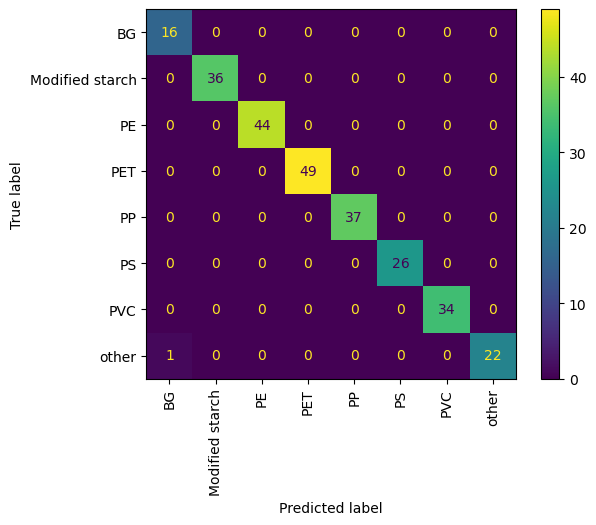

In [ ]:
print("Predicting  on the train set")
t0 = time()
y_pred = clf.predict(X_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_train, y_pred))
cm = confusion_matrix(y_train,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp = disp.plot(include_values=True, cmap='viridis',ax=None)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

In [114]:
# accuracy score check
from sklearn.metrics import accuracy_score
svm = SVC(kernel="rbf", C= 3634.3456314938285 , gamma = 0.0003609724587144569)
svm.fit(X_pca,y_train)
print("Accuacy Train : ",accuracy_score(svm.predict(X_pca),y_train))
print("Accuacy Test : ",accuracy_score(svm.predict(X_test_pca),y_test))

Accuacy Train :  0.9962264150943396
Accuacy Test :  0.9701492537313433


Predicting  on the test set
done in 0.001s
                 precision    recall  f1-score   support

             BG       1.00      1.00      1.00         5
Modified starch       0.83      1.00      0.91         5
             PE       1.00      1.00      1.00        14
            PET       0.93      0.93      0.93        14
             PP       1.00      1.00      1.00         5
             PS       1.00      1.00      1.00        10
            PVC       1.00      1.00      1.00         7
          other       1.00      0.86      0.92         7

       accuracy                           0.97        67
      macro avg       0.97      0.97      0.97        67
   weighted avg       0.97      0.97      0.97        67



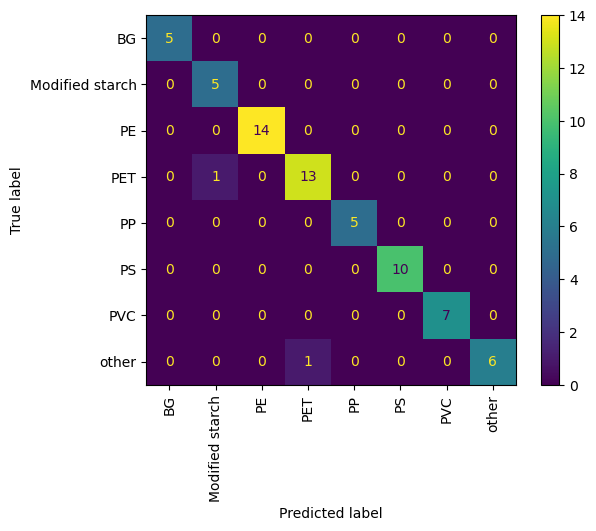

In [57]:
print("Predicting  on the test set")
t0 = time()
y_pred = svm.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp = disp.plot(include_values=True, cmap='viridis',ax=None)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

In [58]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
svm_pca = RandomizedSearchCV(
    SVC(kernel="rbf"), param_grid, n_iter=50
)
svm_pca = svm_pca.fit(X_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(svm_pca.best_estimator_)

Fitting the classifier to the training set
done in 1.129s
Best estimator found by grid search:
SVC(C=6547.053624301805, gamma=0.00020169914387347458)


In [493]:
#pd.DataFrame(svm.predict_proba(X_test),columns=["BG","modified starch","PE","PET","PP","PS","PVC","other"])

In [206]:
#CNN
X_train.shape


(265, 463)

In [64]:
!pip install scikit-image
!pip install spectral

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches
from matplotlib.colors import ListedColormap
from skimage.measure import label, regionprops
from spectral.io import envi

In [117]:
#輸入hdr檔案
img = envi.open("./HDR/PE/PE_3_RT.hdr") # 檔案路徑
meta = img.metadata
wave = meta['wavelength']
default =meta['default bands']
default = np.array(meta["default bands"], "i") - 52
data = img.asarray()
data = np.nan_to_num(data, posinf=0, neginf=0)
false_img = data[..., default]
w, h, b = data.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2].


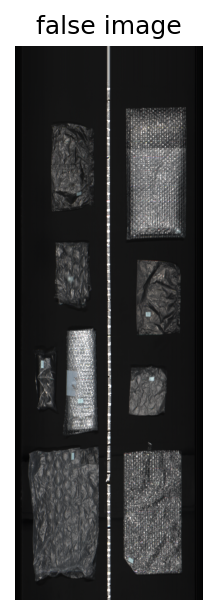

In [118]:
# 輸出套色影像
fig, ax = plt.subplots(dpi=150)
ax.axis("off")
plt.title("false image")
ax.imshow(false_img)

In [119]:
# 預測類別
data_2d = data.reshape(w*h,b)
data_2d = data_2d[:,10:-39]
predict_data= svm_pca.predict(pca.transform(data_2d))
#predict_data = svm.predict(data_2d)

/Users/alicetsai/opt/anaconda3/envs/python3_10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [68]:
data_2d.shape

(823680, 463)

In [120]:
color_dict ={"PS":"yellow",
             "PE":"red",
             "PET":"green",
             "Modified starch":"pink",
             "PP":"blue",
             "PVC":"orange",
             "BG":"black",
             "other":"white"}


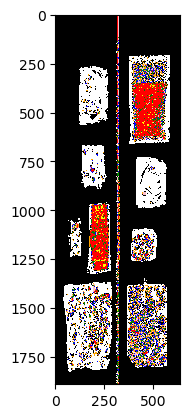

In [121]:
#輸出類別影像
from matplotlib.colors import ListedColormap

color_list = np.asarray(list(color_dict.items()))

index_result = []
check = False
count = 0
for item in predict_data:
    for index, sub_list in enumerate(color_list):
        if item == sub_list[0]:
            index_result.append(index)
    #         check = True
    #         count +=1
    
    # if not check :
    #     print(item)
    # check = False

plt.imshow(np.array(index_result).reshape(w,h), cmap=ListedColormap(color_list[:, 1]))
plt.grid(False)

In [49]:
pd.Series(index_result).value_counts()

6    1100051
1     110732
3      54303
4      19064
7       5462
2       1431
5        973
0        784
Name: count, dtype: int64

In [366]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(SVC(kernel="rbf", C= 16383.185027740394 ,gamma = 0.0015789413352815408 ,probability=True))
clf.fit(X_train,y_train)
y_score = clf.predict(X_test)


In [372]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_predict = label_binarizer.transform(y_score)
label_binarizer.transform(['PP'])
class_of_interest = "PP"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

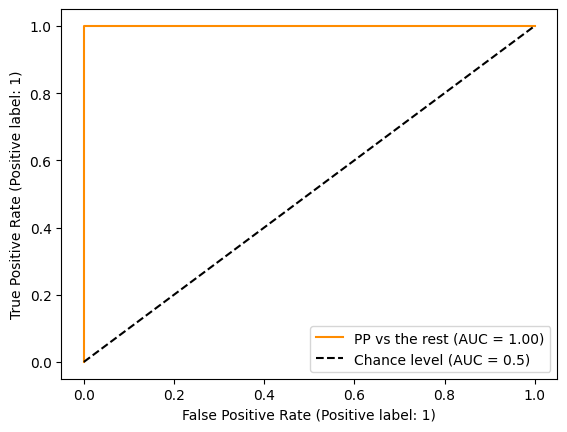

In [377]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:,class_id],
    y_onehot_predict[:,class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)

In [376]:
y_score

array(['PVC', 'PE', 'PVC', 'PET', 'PE', 'PVC', 'PE', 'PET', 'PE', 'PP',
       'BG', 'PP', 'PVC', 'PE', 'PE', 'PE', 'Modified starch', 'BG',
       'Modified starch', 'PE', 'Modified starch', 'Modified starch',
       'PP', 'PP', 'PE', 'other', 'other', 'PE', 'PE', 'Modified starch',
       'PVC', 'PP', 'PS', 'PP', 'BG', 'Modified starch', 'PVC', 'PE',
       'PP', 'PE', 'Modified starch', 'PE', 'Modified starch', 'PP', 'BG',
       'PE', 'BG', 'BG', 'Modified starch', 'BG', 'PE', 'PP', 'PET', 'PE',
       'PP', 'BG', 'PET', 'BG', 'PS', 'PE', 'Modified starch', 'PE',
       'Modified starch', 'Modified starch', 'PE', 'BG', 'other', 'BG',
       'PVC', 'PE', 'Modified starch', 'PP', 'PVC', 'PVC',
       'Modified starch', 'PVC', 'PP', 'PE', 'other', 'PP', 'PET', 'PE',
       'PVC', 'PP', 'Modified starch', 'PE', 'PP', 'PP', 'other', 'PE',
       'PE', 'other', 'PS', 'Modified starch', 'PS', 'Modified starch',
       'PE', 'PE', 'PS', 'BG', 'PP'], dtype='<U15')